# 1. Pandas Tutorual

<img src="https://github.com/hushchyn-mikhail/hse_se_ml/blob/s01/2020/s01-intro-to-python/img/pandas.png?raw=1" width="600">

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Series

`Pandas` helps to work with tables in python. The basic structures are `Series` и `DataFrame`. <br/>
`Series` – indexed one-dimensional array of values.

It is possible to create `Series` with an array:

In [ ]:
arr = np.random.rand(5)
ser = pd.Series(arr)

In [ ]:
ser

0    0.857896
1    0.890765
2    0.851902
3    0.174322
4    0.406879
dtype: float64

Left column is index.

In [ ]:
ser.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
ser.values

array([0.85789588, 0.89076459, 0.85190222, 0.17432244, 0.40687928])

In [ ]:
# Take several elements based on their index
ser.loc[3:5, ]

3    0.174322
4    0.406879
dtype: float64

In [ ]:
# Take several elements based on their positions
ser.iloc[3:5, ]

3    0.174322
4    0.406879
dtype: float64

One more example:

In [ ]:
ser = pd.Series(np.random.rand(8), index=['s', 'o', 'f', 't', 'w', 'a', 'r', 'e'])

In [ ]:
ser

s    0.679546
o    0.778898
f    0.538662
t    0.430176
w    0.910613
a    0.262670
r    0.871588
e    0.441173
dtype: float64

In [ ]:
# Take several elements based on their index
ser.loc['o':'t', ]

o    0.778898
f    0.538662
t    0.430176
dtype: float64

In [ ]:
# Take several elements based on their positions
ser.iloc[3:5, ]

t    0.430176
w    0.910613
dtype: float64

## DataFrame

`DataFrame` is indexed multidimentional array, where each column is `Series`.

In [ ]:
# Create a data frame
df = pd.DataFrame(np.random.randn(10, 3),
                  index=range(10),
                  columns=['A', 'B', 'C'])

In [ ]:
# Show the first 5 rows
df.head(5)

,A,B,C
0,-0.671690,1.009903,-1.747954
1,1.244333,-0.218990,0.375456
2,0.526325,0.477482,0.789586
3,-1.556308,-0.572554,-0.282444
4,-0.314908,-1.725073,0.134216


In [ ]:
# Print index and columns of the data frame
print ("Index: ", df.index)
print ("Columns: ", df.columns)

Index:  RangeIndex(start=0, stop=10, step=1)
Columns:  Index(['A', 'B', 'C'], dtype='object')


In [ ]:
# Select elements on their index and column
df.loc[1:3, ['A', 'B']]

,A,B
1,1.244333,-0.218990
2,0.526325,0.477482
3,-1.556308,-0.572554


In [ ]:
# Select elements on their position in the data frame
df.iloc[1:3, 0:2]

,A,B
1,1.244333,-0.218990
2,0.526325,0.477482


In [ ]:
# Transpose the data frame
df.T

,0,1,2,3,4,5,6,7,8,9
A,-0.671690,1.244333,0.526325,-1.556308,-0.314908,2.413872,2.016924,0.324842,0.007645,0.995691
B,1.009903,-0.218990,0.477482,-0.572554,-1.725073,1.427378,-0.455745,0.383101,-0.693051,-0.361286
C,-1.747954,0.375456,0.789586,-0.282444,0.134216,-0.719024,-0.132391,1.754869,-0.401459,1.033772


Aggregation (on columns by default)

In [ ]:
# Aggregation on all columns
df.mean()

A    0.498673
B   -0.072883
C    0.080463
dtype: float64

In [ ]:
# Aggregation on 'A' column only
df.A.mean()

0.49867269072337095

# 2. Pandas with Real Data

### LAD and Academic Performance

[Article](http://www.ncbi.nlm.nih.gov/pubmed/5676802) Correlation of Performance Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in Human Subjects was published in 1968. 

There was a [sample](https://www.dropbox.com/s/ui14yeeckbc6z7c/drugs-and-math.csv?dl=0) with 7 observables.

In [ ]:
# Run it if you are in Colab
# !wget 'https://raw.githubusercontent.com/hushchyn-mikhail/hse_se_ml/s01/2020/s01-intro-to-python/drugs-and-math.csv'

In [ ]:
# Read data from a .csv file 
df = pd.read_csv('drugs-and-math.csv', index_col=0, sep=',')

In [ ]:
# Show the first 5 rows
df.head()

,Drugs,Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [ ]:
print (df.shape) # Size of the data frame
print (df.columns) # List of the columns
print (df.index) # Index of rows in the data frame

(7, 2)
Index(['Drugs', 'Score'], dtype='object')
Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


Lets sort the DataFrame by Score

In [ ]:
# Sorting by 'Score' column
df = df.sort_values('Score', ascending=False)

In [ ]:
df.head()

,Drugs,Score
0,1.17,78.93
2,3.26,67.47
1,2.97,58.20
4,5.83,45.65
3,4.69,37.47


In [ ]:
# Show a report with several statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Drugs,7.0,4.332857,1.935413,1.17,3.115,4.69,5.915,6.41
Score,7.0,50.087143,18.610854,29.97,35.195,45.65,62.835,78.93



https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


* How much objects are in the sample?
* What features describe the objects? How much these features?
* What is feature a target variable?
* What are their ranges?
* Are there any missing values?

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# How much objects are in the sample?
df.shape[0]

1599

In [ ]:
len(df)

1599

In [ ]:
# What features describe the objects? How much these features?
features = df.columns[:-1]
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
# What is feature a target variable?
df[['quality']] # df['quality']

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [ ]:
# What are their ranges?
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
corr = df.corr()

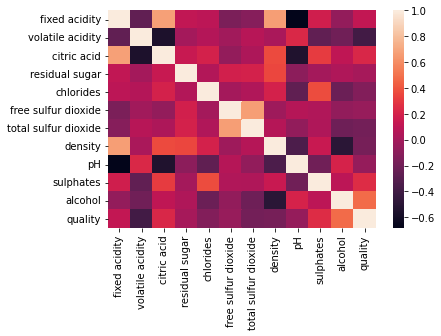

In [ ]:
sns.heatmap(corr)